In [1]:
import numpy as np
from matplotlib import pyplot
from scipy import stats
%matplotlib inline

Генерируем набор точек на плоскости. Для каждой точки $x \in [0,10]$, $y = 0.5x+1+\varepsilon$, $\varepsilon \sim N(0,0.2)$

In [2]:
x = np.linspace(0,10,500)
y = np.ones(500) + 0.5 * x + stats.norm.rvs(size=500, loc=0, scale=0.2**0.5)

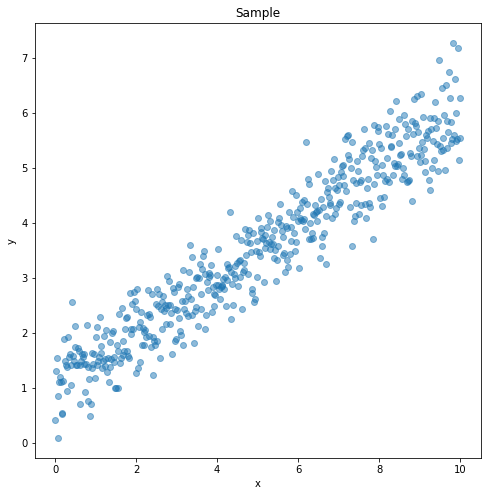

In [3]:
pyplot.figure(figsize=(8,8))
pyplot.scatter(x, y, alpha=0.5)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.title('Sample')

Предположим, что зависимость имеет вид $y=kx+b$. Восстановим эту зависимость по точкам выборки, минимизируя $MSE$ - среднеквадратичное отклонение. Начальное приближение выберем исходя из постановки задачи: $k=0.5,\ b=1$

In [4]:
from scipy import optimize
from random import uniform

In [5]:
MSE = lambda coefs: np.sum((y - (coefs[0]+coefs[1]*x))**2)

regression_coefs = optimize.minimize(MSE, [1, 0.5]).x
print(u"Восстановлена зависимость y = {}x + {}".format(regression_coefs[1], regression_coefs[0]))

Восстановлена зависимость y = 0.498704892301x + 1.01527035744


Можно убедиться, что при случайном выборе начального приближения результат получается практически таким же.

In [6]:
rand_x0_coefs = optimize.minimize(MSE, [uniform(-10,10), uniform(-10,10)]).x
print(u"Для случайного начального приближения k = {}, b = {}".format(rand_x0_coefs[1], rand_x0_coefs[0]))

Для случайного начального приближения k = 0.498704894526, b = 1.01527034035


Визуализируем восстановленную прямую.

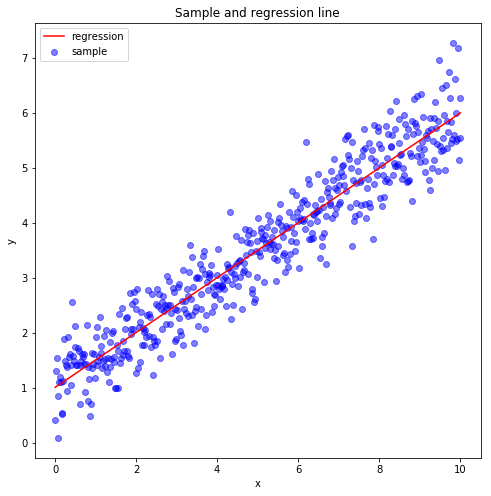

In [7]:
pyplot.figure(figsize=(8,8))
pyplot.scatter(x, y, alpha=0.5, label='sample', color='blue')
pyplot.plot(x, regression_coefs[0]+regression_coefs[1]*x, label='regression', color='red')
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.legend()
pyplot.title('Sample and regression line')

Теперь добавим в выборку 75 точек, не подчиняющихся общему закону распределения: для них $y=-1+\varepsilon$, а $x$ также принимает значения из $[0;10]$.

In [8]:
add_x = np.random.uniform(0,10,75)
new_x = np.concatenate((x, add_x), axis=0)
add_y = -1 * np.ones(75) + stats.norm.rvs(size=75, loc=0, scale=0.2**0.5)
new_y = np.concatenate((y, add_y), axis=0)

Визуализируем новую выборку.

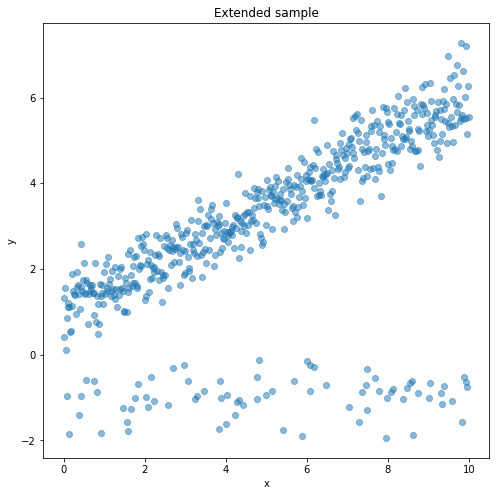

In [9]:
pyplot.figure(figsize=(8,8))
pyplot.scatter(new_x, new_y, alpha=0.5)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.title('Extended sample')

Теперь снова попробуем восстановить зависимость $y=kx+b$. Сделаем это двумя способами: с минимизацией $MSE$ (среднего квадратичного отклонения) и $MAE$ (среднего абсолютного отклонения)

In [10]:
extended_sample_MSE = lambda coefs: np.sum((new_y - (coefs[0]+coefs[1]*new_x))**2)
extended_sample_MAE = lambda coefs: np.sum(np.abs(new_y - (coefs[0]+coefs[1]*new_x)))

regression_coefs_MSE = optimize.minimize(extended_sample_MSE, [1, 0.5]).x
regression_coefs_MAE = optimize.minimize(extended_sample_MAE, [1, 0.5]).x
print(u"При минимизации MSE восстановлена зависимость y = {}x + {}".format(regression_coefs_MSE[1], regression_coefs_MSE[0]))
print(u"При минимизации MAE восстановлена зависимость y = {}x + {}".format(regression_coefs_MAE[1], regression_coefs_MAE[0]))

При минимизации MSE восстановлена зависимость y = 0.419201737004x + 0.815792373983
При минимизации MAE восстановлена зависимость y = 0.486800318358x + 0.98628480166


Визуализируем полученные приближения для прямой $y(x)$

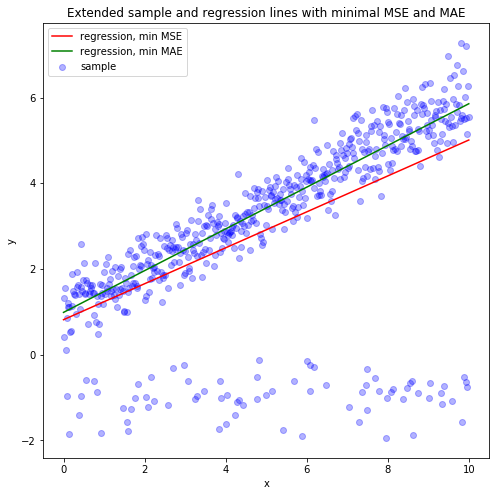

In [12]:
pyplot.figure(figsize=(8,8))
pyplot.scatter(new_x, new_y, alpha=0.3, label='sample', color='blue')
pyplot.plot(x, regression_coefs_MSE[0]+regression_coefs_MSE[1]*x, label='regression, min MSE', color='red')
pyplot.plot(x, regression_coefs_MAE[0]+regression_coefs_MAE[1]*x, label='regression, min MAE', color='green')
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.legend()
pyplot.title('Extended sample and regression lines with minimal MSE and MAE')

Сопоставляя численные значения $k$ и $b$, можно сделать вывод: модель, оптимизирующая $MAE$, более устойчива к выбросам, чем модель, оптимизирующая $MSE$.